In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
!rm -r NodosBenchmark-main/
!rm -r main.zip/

rm: cannot remove 'NodosBenchmark-main/': No such file or directory
rm: cannot remove 'main.zip/': No such file or directory


In [4]:
!wget https://github.com/AndrewSpitia/NodosBenchmarkThreads/archive/refs/heads/main.zip
!unzip main.zip

--2022-04-24 17:18:52--  https://github.com/AndrewSpitia/NodosBenchmarkThreads/archive/refs/heads/main.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/AndrewSpitia/NodosBenchmarkThreads/zip/refs/heads/main [following]
--2022-04-24 17:18:53--  https://codeload.github.com/AndrewSpitia/NodosBenchmarkThreads/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 192.30.255.121
Connecting to codeload.github.com (codeload.github.com)|192.30.255.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [ <=>                ]  53.16K  --.-KB/s    in 0.01s   

2022-04-24 17:18:53 (4.03 MB/s) - ‘main.zip’ saved [54431]

Archive:  main.zip
4b5504a6a3d1a24bee0f411d08a99c64505dc50f
   creating: NodosBenchmarkThreads-ma

In [5]:
nodes=["A","B","C", "D"]
dfs=[pd.read_csv("NodosBenchmarkThreads-main/Codes/results/results-"+node+".csv") for node in nodes]

In [6]:
datos = pd.concat([dfs[0]['Time'].describe(),dfs[1]['Time'].describe(),dfs[2]['Time'].describe(),dfs[3]['Time'].describe()],axis=1)

In [7]:
datos

,Time,Time,Time,Time
count,2592.000000,2592.000000,2592.000000,2592.000000
mean,10.859185,16.288993,29.344651,17.936089
std,28.385791,38.796676,76.545652,45.185118
min,0.000547,0.000544,0.000555,0.000595
25%,0.008373,0.008549,0.012201,0.012378
50%,0.209337,0.426628,0.264050,0.241285
75%,4.201158,7.802015,7.215818,6.891859
max,187.600929,291.779235,1430.302445,260.892571


In [8]:
df=dfs[0]
dfs.remove(dfs[0])

In [9]:
for df2 in dfs:
  df=df.append(df2)

In [10]:
df

,Node,NumThreads,Load,Algorithm,Time
0,A,1,96,Algorithm1,0.001871
1,A,1,96,Algorithm1,0.001873
2,A,1,96,Algorithm1,0.001863
3,A,1,96,Algorithm1,0.001867
4,A,1,96,Algorithm1,0.001974
...,...,...,...,...,...
2587,D,8,3200,Algorithm3,67.360147
2588,D,8,3200,Algorithm3,71.076144
2589,D,8,3200,Algorithm3,67.586764
2590,D,8,3200,Algorithm3,68.091901


In [11]:
dfPrueba = df[df["Load"]<=400]

In [12]:
dfPrueba2 = df[df["Load"]>=800]

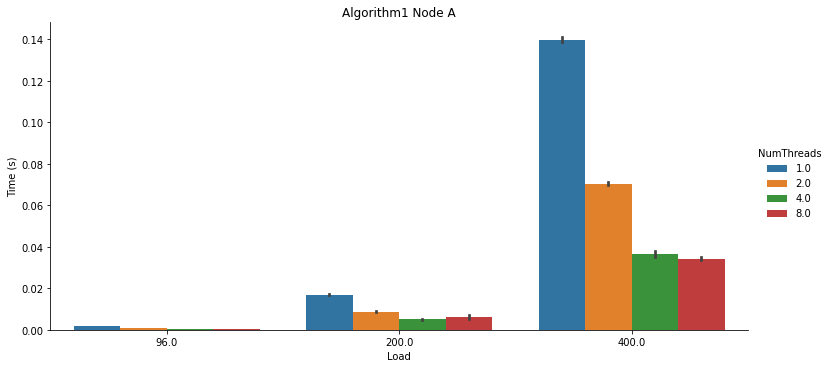

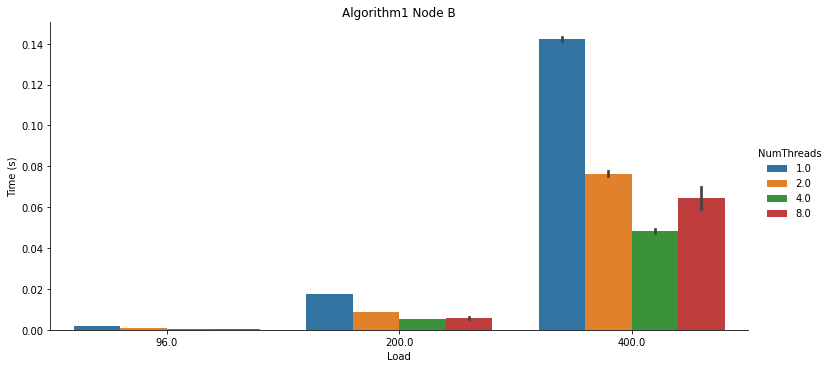

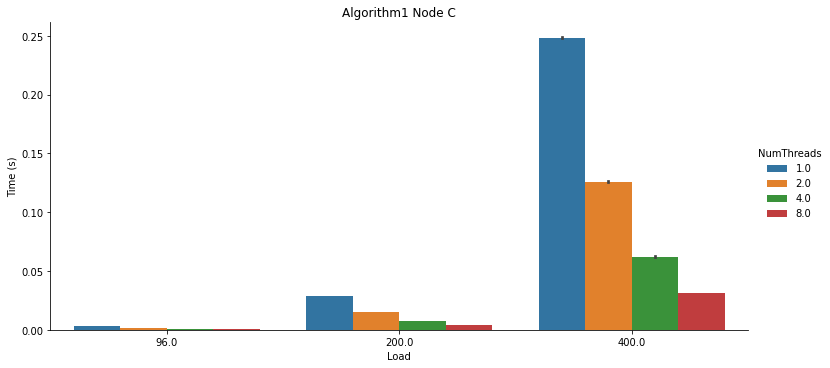

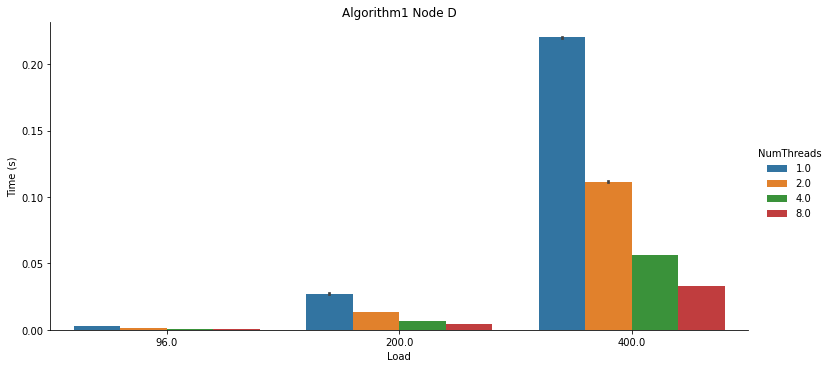

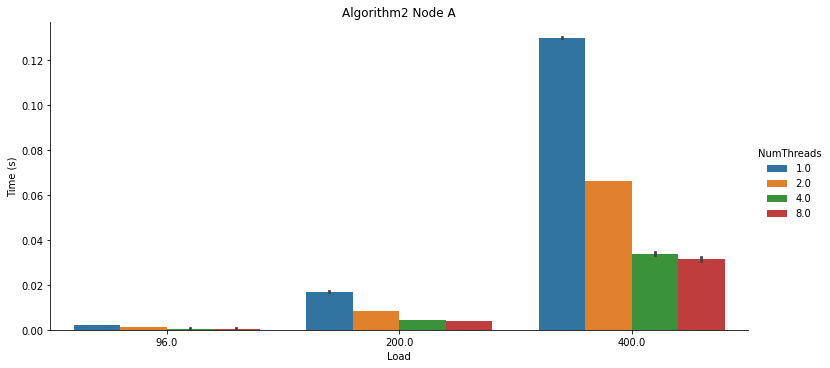

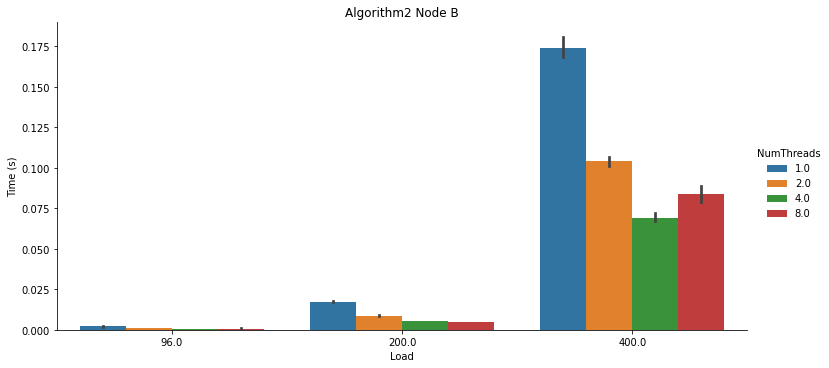

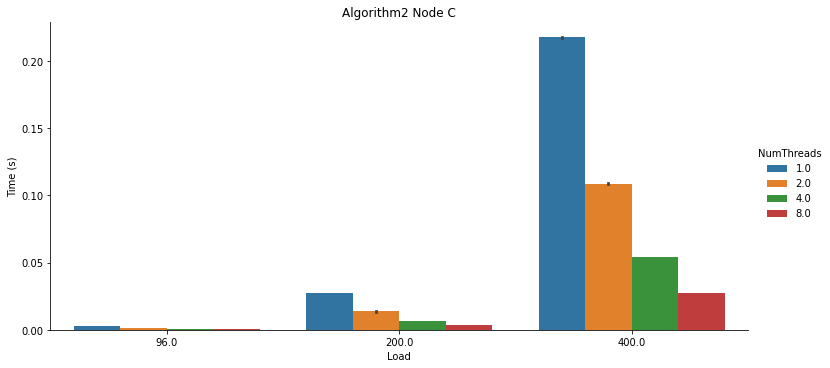

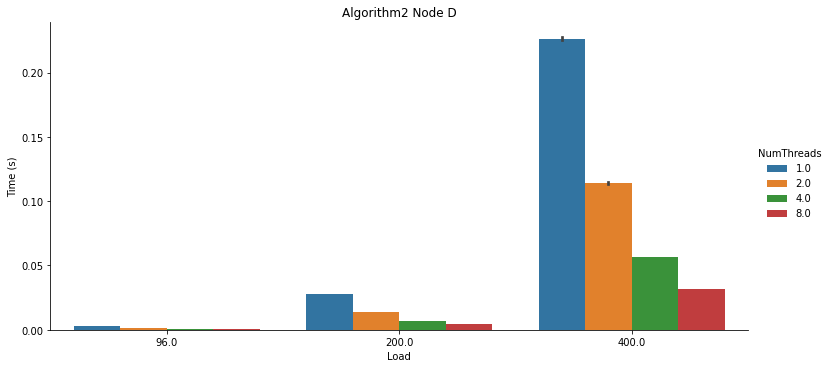

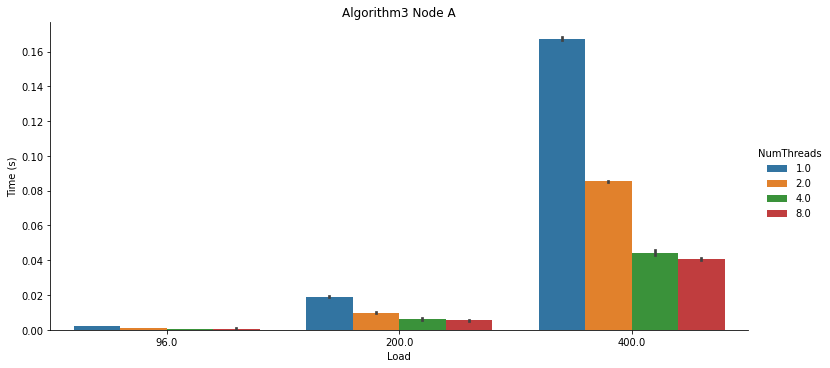

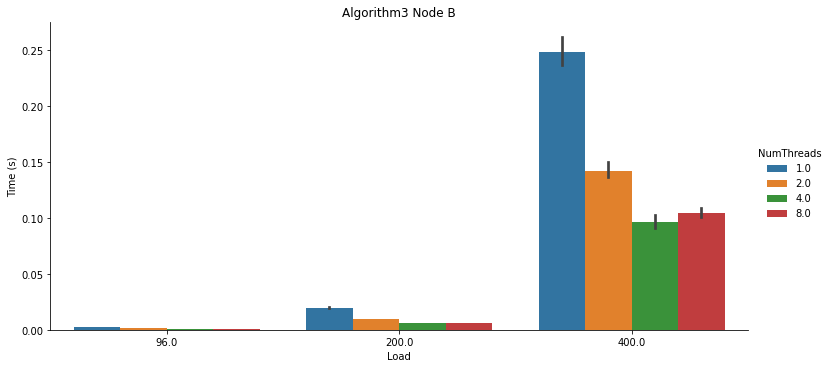

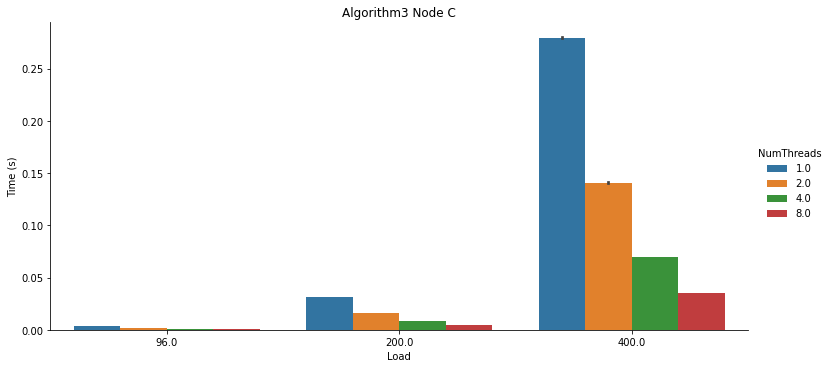

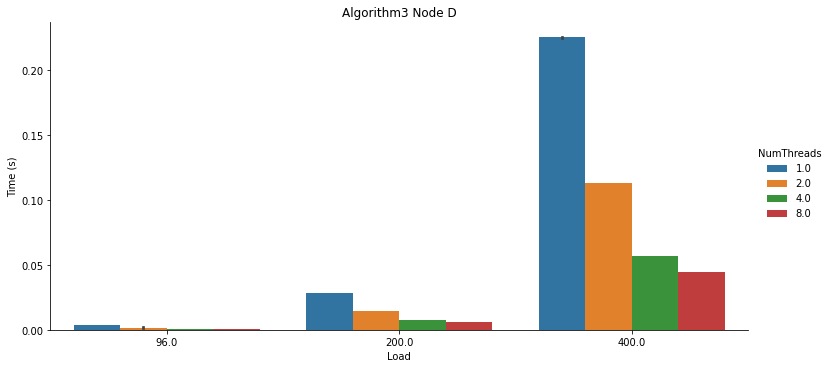

In [13]:
algoritm = ['Algorithm1', 'Algorithm2', 'Algorithm3']
for i in algoritm:
  df3 = dfPrueba.where(dfPrueba['Algorithm']==i,inplace = False)
  df3 = df3.dropna()
  for j in nodes:
    df4 = df3.where(df3['Node']==j)
    df4 = df4.dropna()
    sns.catplot(data=df4, kind='bar',x='Load', y='Time', hue='NumThreads', aspect = 17/8).set(xlabel='Load', ylabel='Time (s)',title=i+" Node "+j)

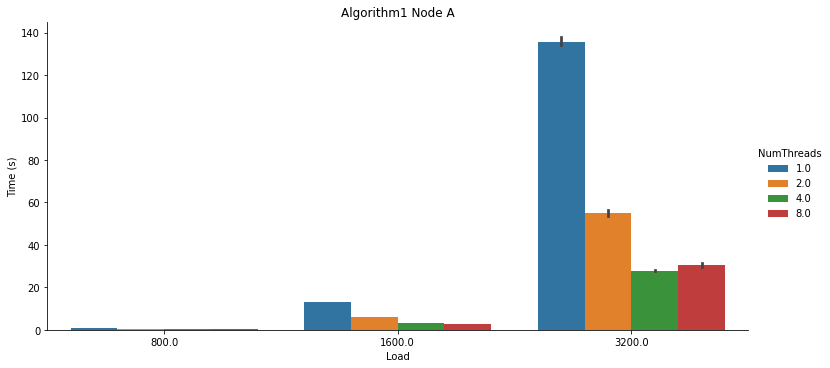

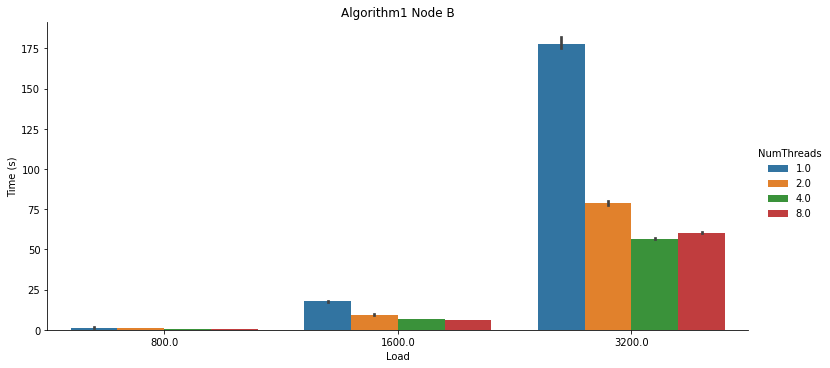

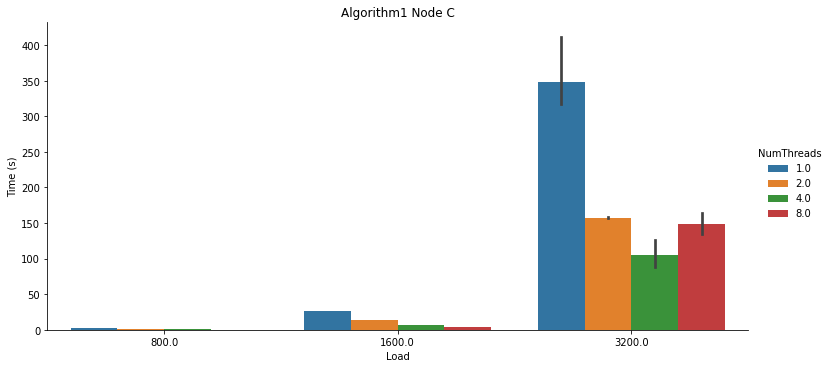

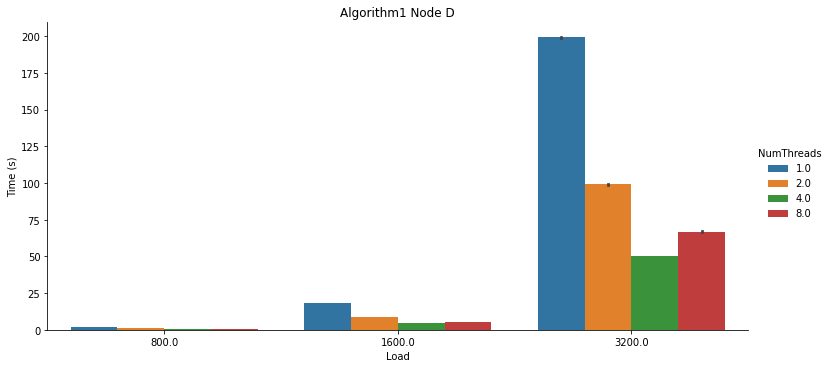

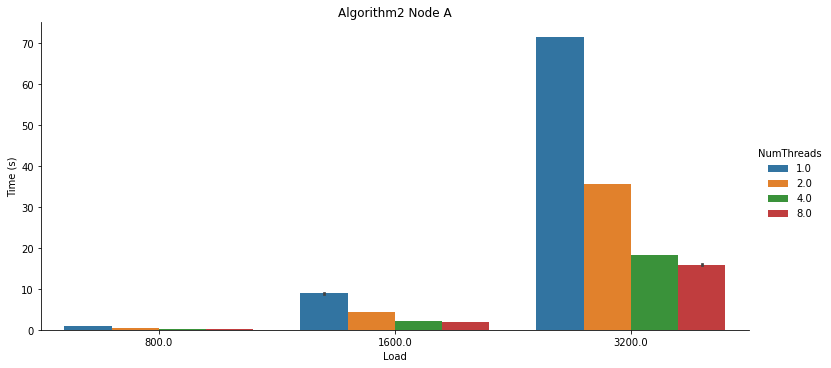

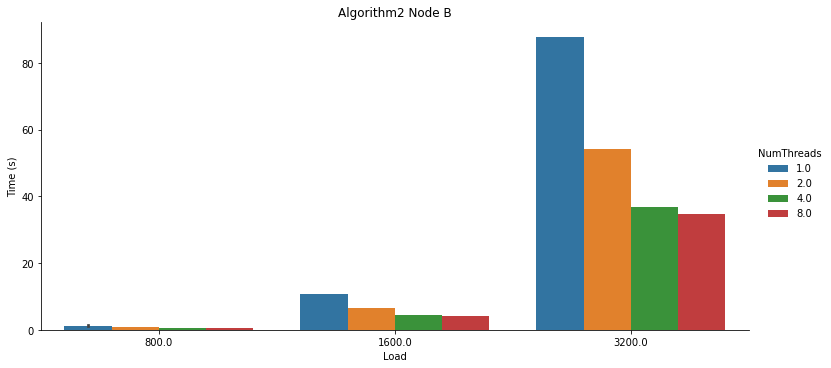

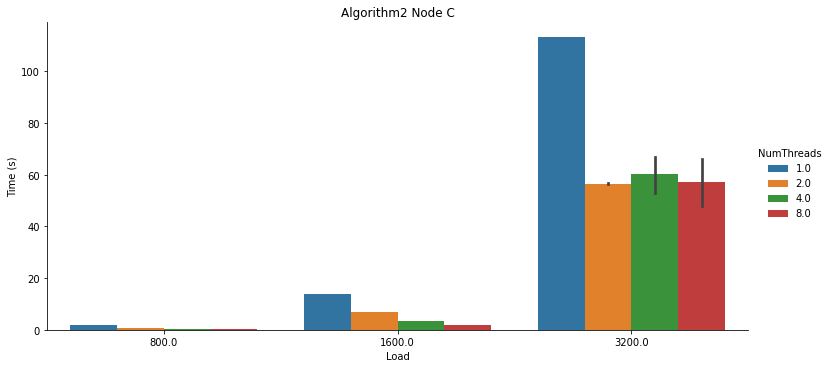

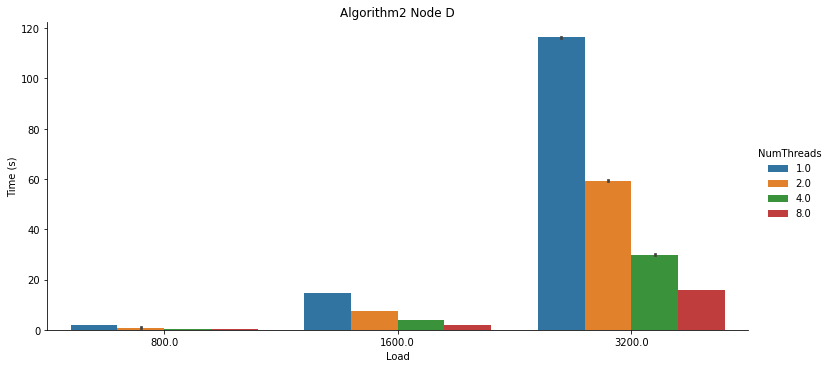

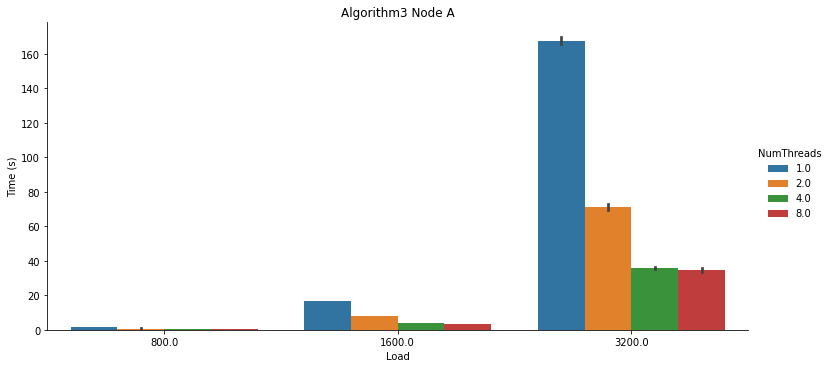

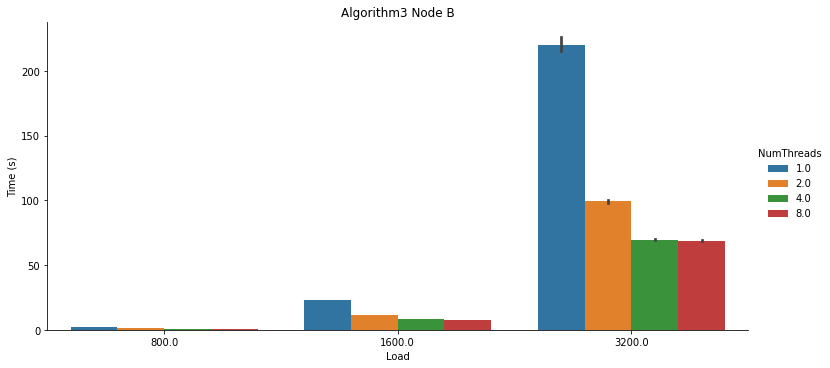

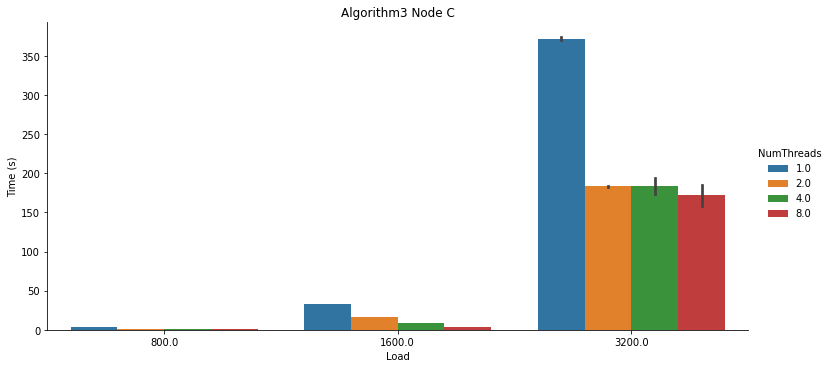

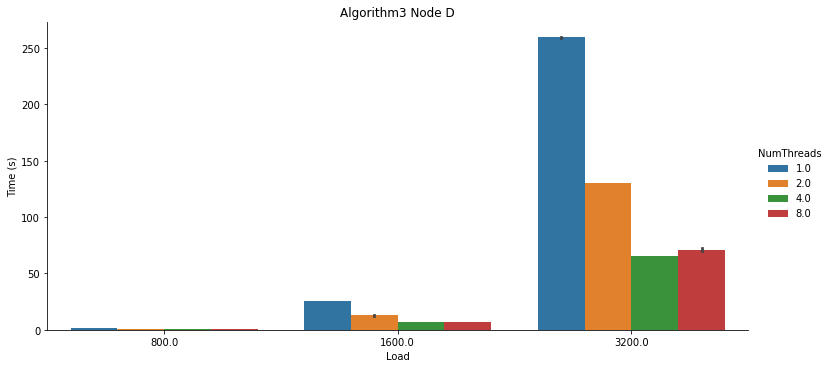

In [14]:
algoritm = ['Algorithm1', 'Algorithm2', 'Algorithm3']
for i in algoritm:
  df3 = dfPrueba2.where(dfPrueba2['Algorithm']==i,inplace = False)
  df3 = df3.dropna()
  for j in nodes:
    df4 = df3.where(df3['Node']==j)
    df4 = df4.dropna()
    sns.catplot(data=df4, kind='bar',x='Load', y='Time', hue='NumThreads', aspect = 17/8).set(xlabel='Load', ylabel='Time (s)',title=i+" Node "+j)

In [15]:
gk = df.groupby(['Node','NumThreads', 'Load','Algorithm'])
df2 = gk['Time'].describe()
df2

count       mean       std        min  \
Node NumThreads Load Algorithm                                           
A    1          96   Algorithm1   36.0   0.001991  0.000045   0.001863   
                     Algorithm2   36.0   0.001982  0.000010   0.001973   
                     Algorithm3   36.0   0.002210  0.000125   0.002102   
                200  Algorithm1   36.0   0.017005  0.000581   0.016627   
                     Algorithm2   36.0   0.016916  0.000942   0.016447   
...                                ...        ...       ...        ...   
D    8          1600 Algorithm2   36.0   1.966712  0.012846   1.941170   
                     Algorithm3   36.0   6.601067  0.073965   6.499540   
                3200 Algorithm1   36.0  66.864943  1.259679  64.526206   
                     Algorithm2   36.0  15.719214  0.109829  15.540967   
                     Algorithm3   36.0  70.874481  4.432265  64.929745   

                                       25%        50%        75%        max  
Node NumThreads Load Algorithm                                               
A    1          96   Algorithm1   0.001999   0.002003   0.002008   0.002035  
                     Algorithm2   0.001977   0.001979   0.001982   0.002028  
                     Algorithm3   0.002142   0.002156   0.002182   0.002522  
                200  Algorithm1   0.016843   0.016913   0.016958   0.020326  
                     Algorithm2   0.016492   0.016586   0.016953   0.021309  
...                                    ...        ...        ...        ...  
D    8          1600 Algorithm2   1.959086   1.967226   1.974988   1.992850  
                     Algorithm3   6.552819   6.580174   6.627930   6.780941  
                3200 Algorithm1  65.976607  66.890113  67.582539  70.779334  
                     Algorithm2  15.642227  15.713664  15.792408  16.085001  
                     Algorithm3  67.321157  69.853335  73.841133  81.719290  

[288 rows x 8 columns]

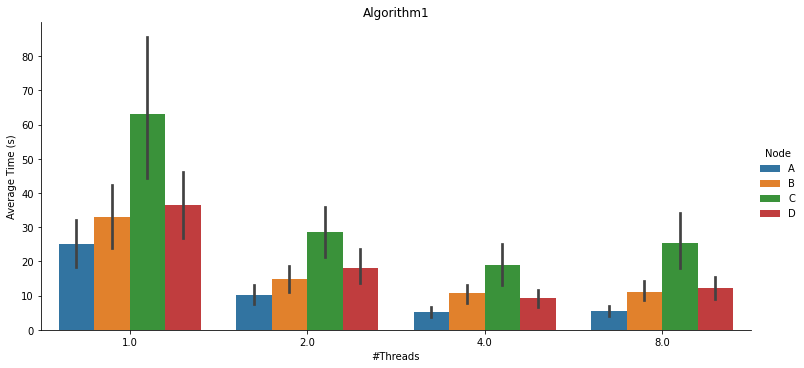

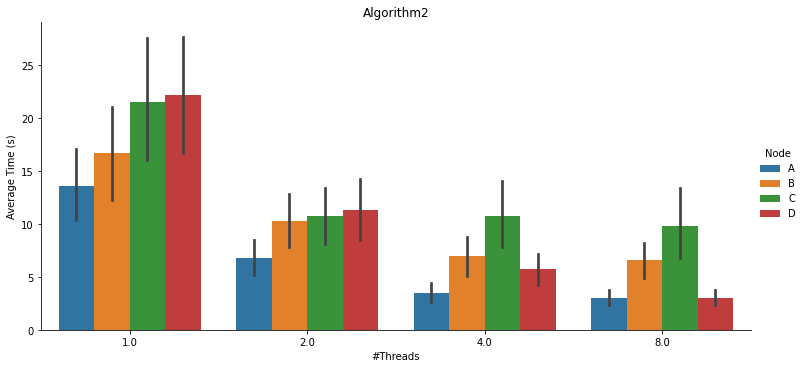

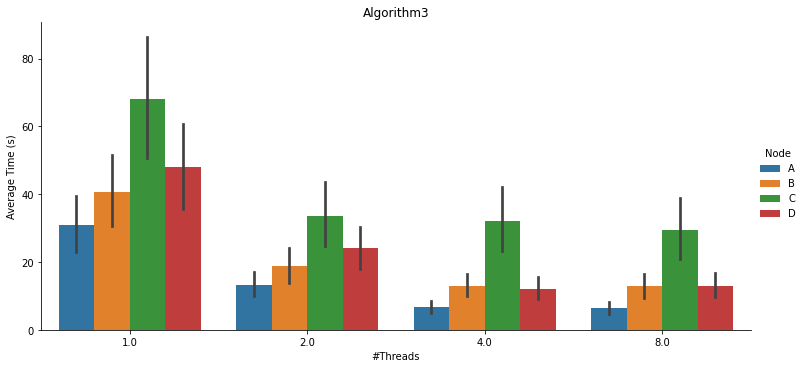

In [16]:
algoritm = ['Algorithm1', 'Algorithm2', 'Algorithm3']
NumThreads = [1.0,2.0,4.0,8.0]
for i in algoritm:
  df3 = df.where(df['Algorithm']==i,inplace = False)
  df3 = df3.dropna()
  sns.catplot(data=df3, kind='bar',x='NumThreads', y='Time', hue='Node', aspect = 17/8).set(xlabel='#Threads', ylabel='Average Time (s)',title=i)
#INNECESARIO

## Ley de Amdahl para el tiempo promedio de ejecuciones por cada nodo y cada algoritmo.

In [86]:
dfGrouped=df.groupby(["Node","NumThreads","Load","Algorithm"]).agg(['mean','std']).reset_index()

In [63]:
import os
import shutil
def makezip(dir):
  shutil.make_archive(dir, 'zip', dir)
def makedir(path):
  try:
    os.mkdir(path)
  except OSError as error:
    print(error)

[Errno 17] File exists: './figures/'


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


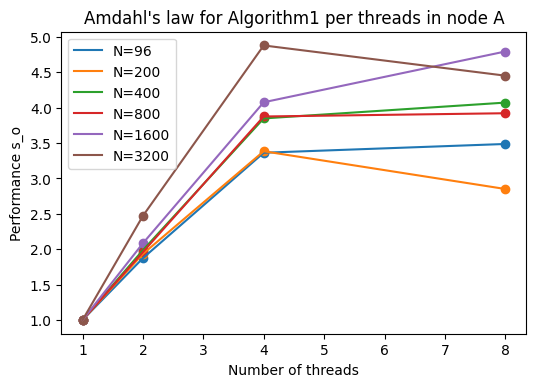

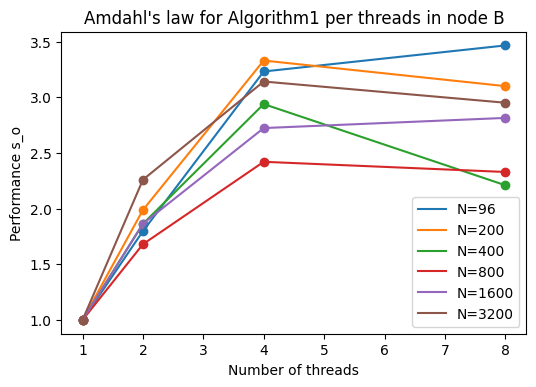

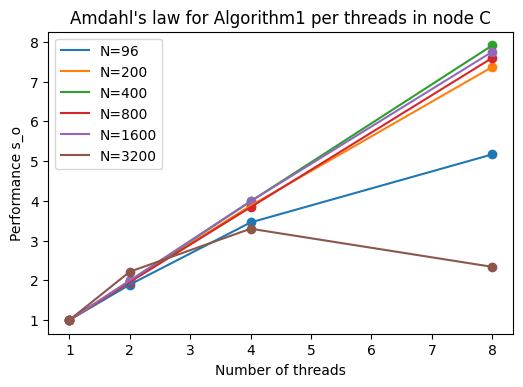

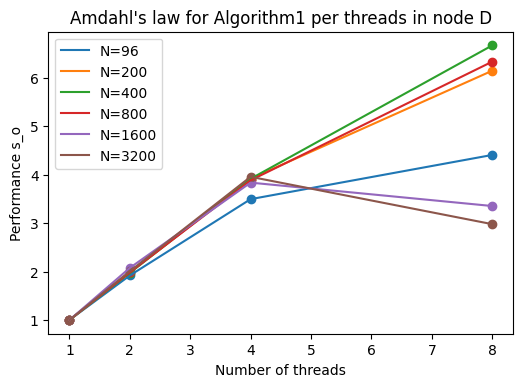

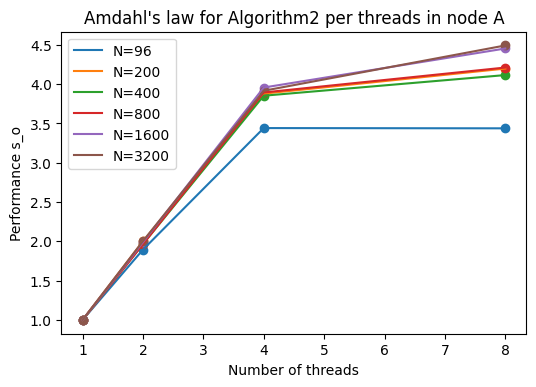

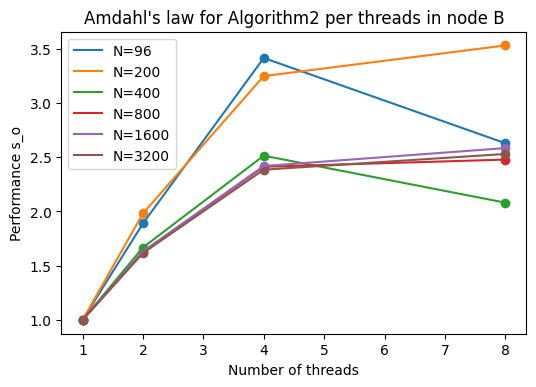

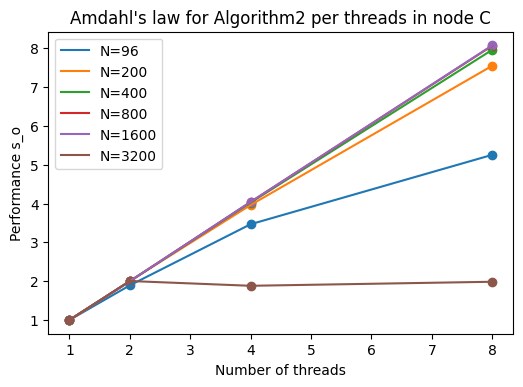

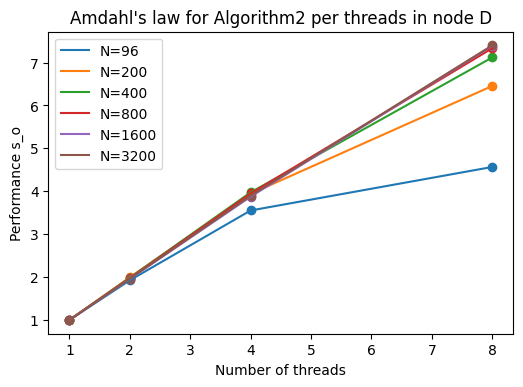

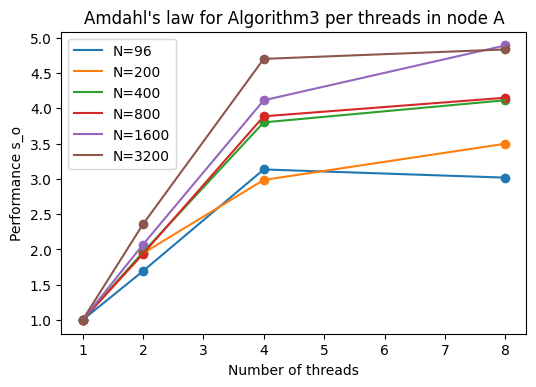

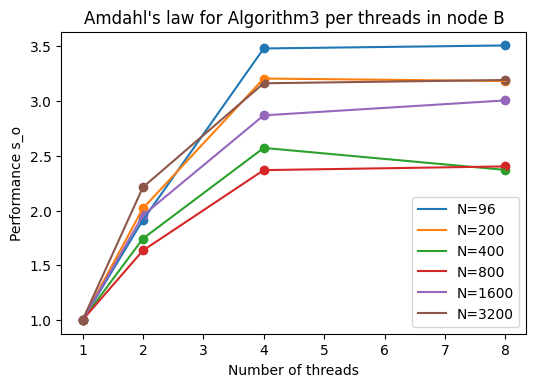

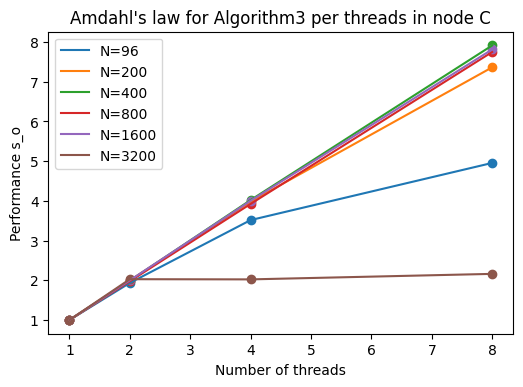

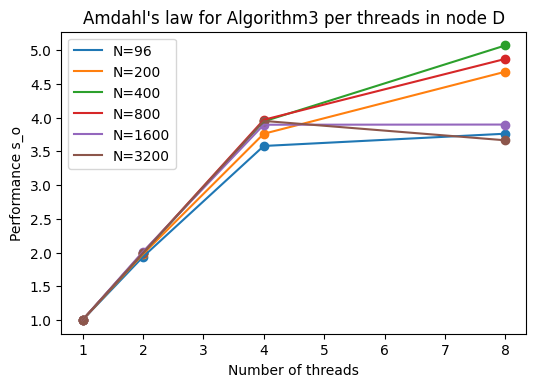

In [103]:
loads=[96,200,400,800,1600,3200]
algorithms=["Algorithm1","Algorithm2","Algorithm3"]
makedir("./figures/")
plt.rcParams["figure.dpi"]=100
for algorithm in algorithms:
  for node in nodes:
    dfNode=dfGrouped[dfGrouped["Algorithm"]==algorithm]
    dfNode=dfNode[dfGrouped["Node"]==node].reset_index(drop="index")
    for load in loads:
      dftest=dfNode[dfNode["Load"]==load]
      performance=[]
      for exec_time in dftest.values:
        performance.append(dftest.values[0][4]/exec_time[4])
      plt.plot([1,2,4,8],performance)
      plt.scatter([1,2,4,8],performance)
    plt.legend(["N="+str(load) for load in loads])
    plt.title("Amdahl's law for "+algorithm+" per threads in node "+node)
    plt.xlabel("Number of threads")
    plt.ylabel("Performance s_o")
    plt.savefig("./figures/Amdahlslaw"+algorithm+""+node+".png")
    plt.show()
makezip("./figures")

## Ley de Amdahl comparativa entre algoritmos

Se toma únicamente la ejecución de carga de 3200 ya que presenta las mayores diferencias entre algoritmos.

In [105]:
for node in nodes:
  dA=dfGrouped[dfGrouped["Node"]==node]
  print(dA.groupby(["Algorithm"]).min("std"))

           NumThreads Load      Time          
                                mean       std
Algorithm                                     
Algorithm1          1   96  0.000571  0.000012
Algorithm2          1   96  0.000576  0.000009
Algorithm3          1   96  0.000705  0.000012
           NumThreads Load      Time          
                                mean       std
Algorithm                                     
Algorithm1          1   96  0.000569  0.000015
Algorithm2          1   96  0.000597  0.000007
Algorithm3          1   96  0.000635  0.000006
           NumThreads Load      Time          
                                mean       std
Algorithm                                     
Algorithm1          1   96  0.000598  0.000018
Algorithm2          1   96  0.000579  0.000016
Algorithm3          1   96  0.000677  0.000018
           NumThreads Load      Time          
                                mean       std
Algorithm                                     
Algorithm1   

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


[Errno 17] File exists: './figuresPerAlgorithm'


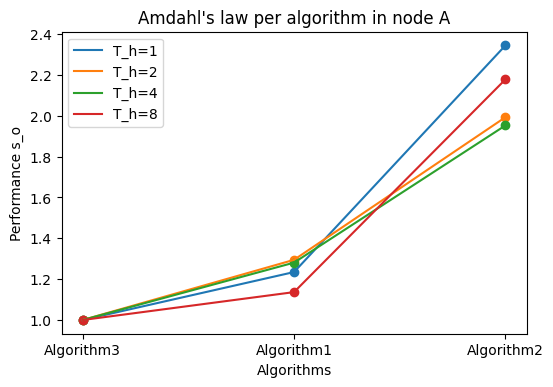

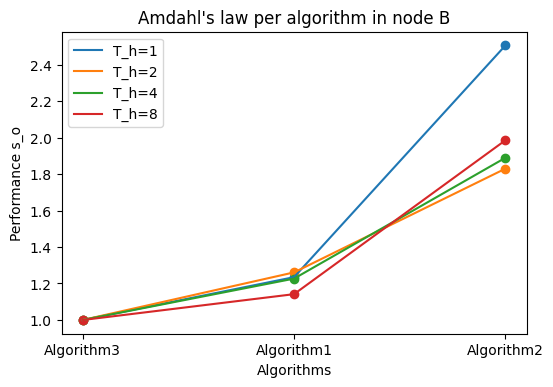

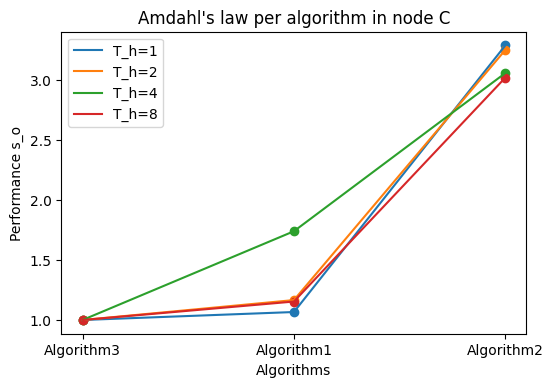

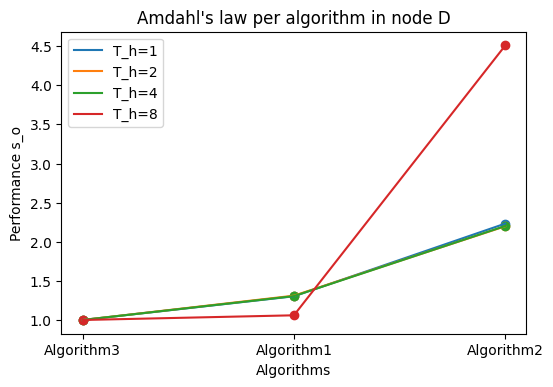

In [144]:
makedir("./figuresPerAlgorithm")
dfAlgorithm=dfGrouped[dfGrouped["Load"]==3200]
numberThreads=[1,2,4,8]
algorithms = ['Algorithm3', 'Algorithm1', 'Algorithm2']
for node in nodes:
  dfSAlgorithm=dfAlgorithm[dfAlgorithm["Node"]==node]
  for numThreads in numberThreads:
    dfSNAlgorithm=dfSAlgorithm[dfSAlgorithm["NumThreads"]==numThreads]
    dfSNAlgorithm=dfSNAlgorithm.sort_values(by=("Time","mean"),ascending=False)
    plt.plot(dfSNAlgorithm["Algorithm"],dfSNAlgorithm["Time"]["mean"].values[0]/dfSNAlgorithm["Time"]["mean"].values)
    plt.scatter(dfSNAlgorithm["Algorithm"],dfSNAlgorithm["Time"]["mean"].values[0]/dfSNAlgorithm["Time"]["mean"].values)
  plt.legend(["T_h="+str(num) for num in numberThreads])
  plt.xlabel("Algorithms")
  plt.ylabel("Performance s_o")
  plt.title("Amdahl's law per algorithm in node "+node)
  plt.savefig("./figuresPerAlgorithm/AmdahlslawForAlgorithmIn"+node+".png")
  plt.show()
makezip("./figuresPerAlgorithm")

In [142]:
dfSAlgorithm[dfSAlgorithm[""]]

Node NumThreads  Load   Algorithm        Time          
                                             mean       std
231    D          1  3200  Algorithm1  199.250473  0.739272
232    D          1  3200  Algorithm2  116.310166  0.473088
233    D          1  3200  Algorithm3  259.615227  0.683109
249    D          2  3200  Algorithm1   99.278272  1.142009
250    D          2  3200  Algorithm2   59.218142  0.580108
251    D          2  3200  Algorithm3  130.151814  0.328284
267    D          4  3200  Algorithm1   50.343245  0.527700
268    D          4  3200  Algorithm2   29.853636  0.379418
269    D          4  3200  Algorithm3   65.719108  0.193200
285    D          8  3200  Algorithm1   66.864943  1.259679
286    D          8  3200  Algorithm2   15.719214  0.109829
287    D          8  3200  Algorithm3   70.874481  4.432265

In [140]:
dfAlgorithm[dfAlgorithm["NumThreads"]==8]

Node NumThreads  Load   Algorithm        Time           
                                             mean        std
69     A          8  3200  Algorithm1   30.471121   2.651083
70     A          8  3200  Algorithm2   15.898284   0.187389
71     A          8  3200  Algorithm3   34.632060   2.959962
141    B          8  3200  Algorithm1   60.278178   1.037735
142    B          8  3200  Algorithm2   34.668370   0.250554
143    B          8  3200  Algorithm3   68.813358   1.450476
213    C          8  3200  Algorithm1  149.179090  46.533573
214    C          8  3200  Algorithm2   57.047823  27.734466
215    C          8  3200  Algorithm3  172.103437  42.405058
285    D          8  3200  Algorithm1   66.864943   1.259679
286    D          8  3200  Algorithm2   15.719214   0.109829
287    D          8  3200  Algorithm3   70.874481   4.432265

In [131]:
dfAlgorithm=dfGrouped[dfGrouped["Load"]==3200]
dfAlgorithm=dfAlgorithm[dfAlgorithm["NumThreads"]==1]

for node in nodes:
  dfSAlgorithm=dfAlgorithm[dfAlgorithm["Node"]==node]

In [112]:
dfSAlgorithm

Node NumThreads Load   Algorithm      Time          
                                          mean       std
216    D          1   96  Algorithm1  0.003014  0.000033
217    D          1   96  Algorithm2  0.003043  0.000037
218    D          1   96  Algorithm3  0.003417  0.000112

In [126]:
dfSAlgorithm["Time"]["mean"].values[0]/dfSAlgorithm["Time"]["mean"].values

array([1.        , 0.99040507, 0.88191396])

In [132]:
dfSAlgorithm

Node NumThreads  Load   Algorithm        Time          
                                             mean       std
231    D          1  3200  Algorithm1  199.250473  0.739272
232    D          1  3200  Algorithm2  116.310166  0.473088
233    D          1  3200  Algorithm3  259.615227  0.683109

In [133]:
dfSAlgorithm.sort_values(by=("Time","mean"),ascending=False)

Node NumThreads  Load   Algorithm        Time          
                                             mean       std
233    D          1  3200  Algorithm3  259.615227  0.683109
231    D          1  3200  Algorithm1  199.250473  0.739272
232    D          1  3200  Algorithm2  116.310166  0.473088